In [1]:
from pathlib import Path
import arviz as az

In [81]:
trace = az.from_netcdf("./methods_1002/nuts/trace.nc")
trace

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data
	> constant_data

In [82]:
from tqdm import tqdm

for draws in tqdm(range(10, 2000)):
    rhat = az.rhat(trace["posterior"].isel(chain=slice(0, 4), draw=slice(0, draws)))
    ess = az.ess(trace["posterior"].isel(chain=slice(0, 4), draw=slice(0, draws)))
    fail = False
    for v in (rhat > 1.01).any().to_dict()["data_vars"].values():
        if v["data"]:
            fail = True

    for v in (ess < 400).any().to_dict()["data_vars"].values():
        if v["data"]:
            fail = True

    if not fail:
        print(draws)
        break

  0%|          | 0/1990 [00:00<?, ?it/s]

 27%|██▋       | 540/1990 [01:13<03:18,  7.31it/s]

550


In [47]:
ess = az.ess(trace["posterior"].isel(chain=slice(0, 4), draw=slice(0, draws))) 
(ess < 400).any()

<xarray.Dataset> Size: 6B
Dimensions:                     ()
Data variables:
    lt_0 - slope                bool 1B False
    lt_0 - intercept            bool 1B False
    lt_0 - delta                bool 1B False
    fs_0 - beta(p=365.25,n=10)  bool 1B False
    fs_1 - beta(p=7,n=3)        bool 1B False
    sigma                       bool 1B False

In [37]:
rhat = az.rhat(trace["posterior"].isel(chain=slice(0, 4), draw=slice(0, 100)))
for v in (rhat > 1.01).any().to_dict()["data_vars"].values():
    if v["data"]:
        print("ah")

ah
ah
ah
ah
ah


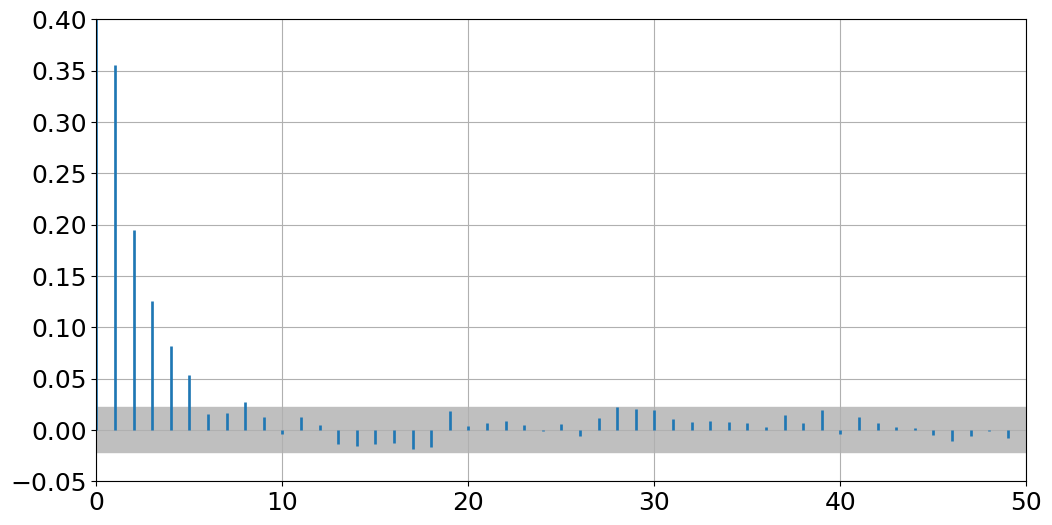

In [84]:
import arviz.labels as azl

trace = az.from_netcdf(Path("./") / "methods_1002/nuts" / "trace.nc")
labeller = azl.MapLabeller(var_name_map={"lt_0 - slope": ""})
ax = az.plot_autocorr(
    trace,
    var_names=["lt_0 - slope"],
    combined=True,
    max_lag=50,
    figsize=(12, 6),
    textsize=18,
    labeller=labeller
)
ax.set_ylim(-0.05, 0.4)
ax.grid()

In [34]:
nuts_trace = az.from_netcdf(Path("./") / "models/methods/nuts" / "trace.nc")
advi_trace = az.from_netcdf(Path("./") / "models/methods/advi" / "trace.nc")
fradvi_trace = az.from_netcdf(Path("./") / "models/methods/fullrank_advi" / "trace.nc")

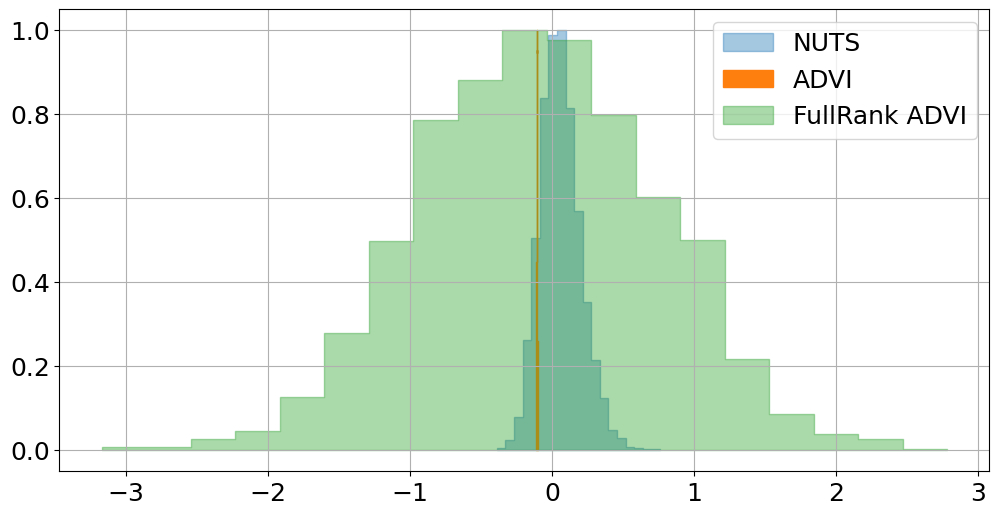

In [86]:
import matplotlib.pyplot as plt
import numpy as np

nuts_trace = az.from_netcdf(Path("./") / "methods_1002/nuts" / "trace.nc")[
    "posterior"
]["lt_0 - slope"].to_numpy()
mh_trace = az.from_netcdf(Path("./") / "methods_1000/metropolis" / "trace.nc")[
    "posterior"
]["lt_0 - slope"].to_numpy()
dmz_trace = az.from_netcdf(Path("./") / "methods_1000/demetropolisz" / "trace.nc")[
    "posterior"
]["lt_0 - slope"].to_numpy()
advi_trace = az.from_netcdf(Path("./") / "methods_1000/advi" / "trace.nc")[
    "posterior"
]["lt_0 - slope"].to_numpy()
fradvi_trace = az.from_netcdf(Path("./") / "methods_1000/fullrank_advi" / "trace.nc")[
    "posterior"
]["lt_0 - slope"].to_numpy()

cnt_bins = 20

plt.figure(figsize=(12, 6))

counts, bins = np.histogram(nuts_trace.flatten(), bins=cnt_bins)
plt.fill_between(
    bins[1:],
    counts / counts.max(),
    step="pre",
    alpha=0.4,
    color=f"C{0}",
    label="NUTS",
)

# counts, bins = np.histogram(mh_trace.flatten(), bins=cnt_bins)
# plt.fill_between(
#     bins[1:],
#     counts / counts.max(),
#     step="pre",
#     alpha=0.4,
#     color=f"C{1}",
#     label="MH",
# )

# counts, bins = np.histogram(dmz_trace.flatten(), bins=cnt_bins)
# plt.fill_between(
#     bins[1:],
#     counts / counts.max(),
#     step="pre",
#     alpha=0.2,
#     color=f"C{2}",
#     label="DMZ",
# )

# plt.step(
#     bins[1:],
#     counts / counts.max(),
#     where="pre",
#     # alpha=0.4,
#     color=f"C{1}",
#     label="Metropolis-Hastings",
# )

counts, bins = np.histogram(advi_trace.flatten(), bins=cnt_bins)
plt.fill_between(
    bins[1:],
    counts / counts.max(),
    step="pre",
    alpha=1,
    color=f"C{1}",
    label="ADVI",
)

counts, bins = np.histogram(fradvi_trace.flatten(), bins=cnt_bins)
plt.fill_between(
    bins[1:],
    counts / counts.max(),
    step="pre",
    alpha=0.4,
    color=f"C{2}",
    label="FullRank ADVI",
)

plt.grid()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=18)
